# ***EXPLORATORY DATA ANALYSIS***

--> EDA is one of the most important phases in data science since it helps us to obtain critical insights and statistical metrics. In general, EDA can be categorised
in two ways.

--> The first distinction is that each method is either non-graphical or graphical.
Second, each method is univariate or multivariate in nature (usually just bivariate).

--> Non-graphical approaches typically include the computation of summary
statistics, but graphical methods clearly summarize the data in a diagrammatic
or pictorial manner.

Let's look at each type individually.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("/content/Flipkart Mobile - 2.csv")

#Dataset

In [3]:
df.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


# DESCRIPTIVE STATISTICS (NON-GRAPHICAL)

In this section, we will look at the Measures of Central Tendency (Mean,
Median, Mode) and Measures of Dispersion (Standard Deviation, Range and
Quartiles)

**Numerical Features**

In [4]:
numerical_features = ['display_size','battery_capacity', 'ratings', 'num_of_ratings', 'sales_price','discount_percent', 'sales']
df_num = df[numerical_features]

In [5]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
display_size,430.0,6.369767,0.369549,4.70,6.30,6.500,6.5000,7.60
battery_capacity,430.0,4529.397674,986.907252,1800.00,4000.00,4500.000,5000.0000,7000.00
ratings,430.0,4.339302,0.151494,3.00,4.30,4.300,4.4000,4.60
num_of_ratings,430.0,23567.944186,56096.277784,4.00,745.00,5197.500,21089.2500,642373.00
sales_price,430.0,25433.234884,22471.926588,5742.00,11999.00,16989.500,28999.0000,157999.00
discount_percent,430.0,0.108000,0.073432,0.01,0.06,0.090,0.1600,0.44
sales,430.0,29.752326,58.399588,0.00,1.64,9.655,29.7175,550.19


**Categorical Feature**

In [6]:
Categorical_Feature = ['brand', 'model', 'base_color', 'processor', 'screen_size', 'ROM','RAM', 'num_rear_camera', 'num_front_camera']
df_cat= df[Categorical_Feature].astype('category')

In [7]:
df_cat.describe().T

,count,unique,top,freq
brand,430,5,Realme,138
model,430,119,iPhone XR,18
base_color,430,12,Blue,117
processor,430,7,Qualcomm,168
screen_size,430,5,Large,242
ROM,430,7,128,192
RAM,430,7,4,133
num_rear_camera,430,4,3,157
num_front_camera,430,3,1,413


In [8]:
brand_counts = df['brand'].value_counts()
brand_counts

,count
brand,
Realme,138
Samsung,119
Xiaomi,61
Apple,56
Poco,56


**BRAND-WISE DISTINCT PRODUCT**

In [9]:
import plotly.graph_objects as go

# Get the count of each brand
brand_counts = df['brand'].value_counts()

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=brand_counts.index,
    values=brand_counts.values,
    hole=0.4,  # Size of the donut hole
    textinfo='label+value',  # Show label and value
    textfont_size=14,
)])

# Update layout to add title
fig.update_layout(
    title_text='BRAND-WISE DISTINCT PRODUCT',
    annotations=[dict(text='Brands', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the plot
fig.show()


Realme offers the most options, as seen by pie charts. In terms of specs, they have a broad range of phones to select from. Poco, on the other hand, has the fewest alternatives. This might be since Poco is a relatively new brand.

**BRAND-WISE MODEL COUNT**

In [10]:
# Count the number of distinct models for each brand
distinct_products_by_brand = df.groupby('brand')['model'].nunique().reset_index()
distinct_products_by_brand.columns = ['Brand', 'Distinct_Product_Count']  # Rename columns for clarity

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=distinct_products_by_brand['Brand'],  # Use the 'Brand' column for labels
    values=distinct_products_by_brand['Distinct_Product_Count'],  # Use the 'Distinct_Product_Count' column for values
    hole=0.4,  # Size of the donut hole
    textinfo='label+value',  # Show label and value
    textfont_size=14,
)])

# Update layout to add title
fig.update_layout(
    title_text='BRAND-WISE MODEL COUNT',
    annotations=[dict(text='Brands', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the plot
fig.show()


Even though Realme offers the most product possibilities, Samsung stands out with a significantly larger number of distinct mobile phone models. In contrast, Apple, despite being a well-known brand, has the smallest number of model options.



**MODEL WISE PRODUCT COUNT**

In [18]:
import plotly.express as px

# Count the number of each model
model_counts = df['model'].value_counts().reset_index()
model_counts.columns = ['Model', 'Count']

# Create a horizontal bar chart
fig = px.bar(model_counts,
             x='Count',
             y='Model',
             orientation='h',  # Horizontal bar chart
             title='MODEL WISE PRODUCT COUNT',
             labels={'Count': 'Number of Phones', 'Model': 'Model'},
             color='Count',
             color_continuous_scale='Viridis')  # Color scale

# Show the plot
fig.show()


The model iphone XR, iphone 12, and iphone 12 mini have the largest
variance within the model, as shown in the above bar chart. There
might be differences in the mobile's specifications, pricing, and colour.
This also explains why Apple and Poco have a lower model count
because they have the most versions with different specifications.

**COLOUR WISE PRODUCT COUNT**

In [19]:
# Count the number of each color
color_counts = df['base_color'].value_counts()

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=color_counts.index,  # Base colors
    values=color_counts.values,  # Count of each color
    hole=0.4,  # Size of the donut hole
    textinfo='label+value',  # Show label and value
    textfont_size=14,  # Font size for text
)])

# Update layout to add title
fig.update_layout(
    title_text='COLOUR WISE PRODUCT COUNT',
    annotations=[dict(text='Colors', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the plot
fig.show()


Blue is the most common colour, followed by black and white.

**PROCESSOR WISE PRODUCT COUNT**

In [21]:
# Count the number of each processor
processor_counts = df['processor'].value_counts()

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=processor_counts.index,  # Processor names
    values=processor_counts.values,  # Count of each processor
    hole=0.4,  # Size of the donut hole
    textinfo='label+value',  # Show label and value
    textfont_size=14,  # Font size for text
    )])

# Update layout to add title
fig.update_layout(
    title_text='PROCESSOR WISE PRODUCT COUNT',
    annotations=[dict(text='Processors', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the plot
fig.show()

Qualcomm is the most prevalent CPU brand, accounting for 168 of the 430 mobile phones. Together, MediaTek and Qualcomm offer processors for more than half of all mobile phones.

**SCREENSIZE WISE PRODUCT COUNT**

In [23]:
# Count the number of each screen size
screen_size_counts = df['screen_size'].value_counts()

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=screen_size_counts.index,  # Screen sizes
    values=screen_size_counts.values,  # Count of each screen size
    hole=0.4,  # Size of the donut hole
    textinfo='label+value',  # Show label and value
    textfont_size=14,  # Font size for text
)])

# Update layout to add title
fig.update_layout(
    title_text='SCREENSIZE WISE PRODUCT COUNT',
    annotations=[dict(text='Screen Sizes', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the plot
fig.show()

Half of the mobile products fall into the large category, with screens larger than 6.35 inches. Due to the wide selection available in big and medium sizes, other display sizes are less consistent.

In [29]:
# Assuming df is your DataFrame

# Convert 'RAM' and 'ROM' to categorical bins
df['RAM_category'] = pd.cut(df['RAM'], bins=[0, 2, 4, 6, 8, 16], labels=['<2GB', '2GB', '4GB', '6GB', '8GB+'])
df['ROM_category'] = pd.cut(df['ROM'], bins=[0, 16, 32, 64, 128, 256], labels=['<16GB', '16GB', '32GB', '64GB', '128GB+'])

# Convert 'num_rear_camera' and 'num_front_camera' to categorical
df['num_rear_camera_category'] = df['num_rear_camera'].astype(str) + '-camera'
df['num_front_camera_category'] = df['num_front_camera'].astype(str) + '-camera'


In [30]:
import plotly.express as px
import matplotlib.pyplot as plt

# Convert to categorical
categories = {
    'RAM_category': 'RAM',
    'ROM_category': 'ROM',
    'num_rear_camera_category': 'Rear Cameras',
    'num_front_camera_category': 'Front Cameras'
}

for cat_col, title in categories.items():
    # Count occurrences of each category
    category_counts = df[cat_col].value_counts().sort_values(ascending=False)

    # Plot horizontal bar chart
    fig = px.bar(
        category_counts,
        x=category_counts.values,
        y=category_counts.index,
        orientation='h',
        labels={'x': 'Count', 'y': title},
        title=f'{title} Count in Descending Order'
    )

    # Show plot
    fig.show()


The bar graphs above indicate the number of different products based on the features - RAM, ROM, number of front cameras, and number of back cameras.

There are around 192 mobile phones with 128 GB of ROM and 133 mobile phones with 4 GB of RAM.

Mobile phones with multiple front cameras are rare, but phones with multiple rear cameras are widespread

**BRANDWISE NO. OF UNITS SOLD**

In [31]:
# Group by 'brand' and sum the 'num_of_ratings' column
brand_ratings = df.groupby('brand')['num_of_ratings'].sum().reset_index()

# Sort by the number of ratings in descending order
brand_ratings = brand_ratings.sort_values(by='num_of_ratings', ascending=False)

In [33]:
# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=brand_ratings['brand'],
    values=brand_ratings['num_of_ratings'],
    hole=0.4,  # Size of the donut hole
    textinfo='label+value',  # Show label and value
    textfont_size=14,
)])

# Update layout to add title
fig.update_layout(
    title_text='Brand-wise Number of Ratings',
    annotations=[dict(text='Brands', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the plot
fig.show()


Realme appears to be doing well in terms of sales, with more than 4 million smartphones sold on Flipkart. While premium mobile brands such as Apple and Samsung are lagging in sales, this might be attributed to their expensive pricing.



**Processor and Brand Wise Sales**


In [34]:
# Group by 'processor' and 'brand' and sum the 'sales' column
processor_brand_sales = df.groupby(['processor', 'brand'])['sales'].sum().reset_index()

In [35]:
# Create a sunburst chart
fig = px.sunburst(
    processor_brand_sales,
    path=['processor', 'brand'],
    values='sales',
    title='Processor and Brand Wise Sales'
)

# Show the plot
fig.show()

For Indian customers, Qualcomm and MediaTek are the preferred CPU brands, accounting for more than 70% of overall sales. Xiaomi is a major supporter of Qualcomm, while Realme favors MediaTek.



In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   brand                      430 non-null    object  
 1   model                      430 non-null    object  
 2   base_color                 430 non-null    object  
 3   processor                  430 non-null    object  
 4   screen_size                430 non-null    object  
 5   ROM                        430 non-null    int64   
 6   RAM                        430 non-null    int64   
 7   display_size               430 non-null    float64 
 8   num_rear_camera            430 non-null    int64   
 9   num_front_camera           430 non-null    int64   
 10  battery_capacity           430 non-null    int64   
 11  ratings                    430 non-null    float64 
 12  num_of_ratings             430 non-null    int64   
 13  sales_price                430 non-

# CORRELATION HEATMAP

In [38]:
features = [ 'ROM','RAM', 'display_size', 'num_rear_camera', 'num_front_camera','battery_capacity', 'ratings',
            'num_of_ratings', 'sales_price','discount_percent', 'sales']

In [39]:
df_co =df[features]

In [40]:
# Calculate the correlation matrix
correlation_matrix = df_co.corr()

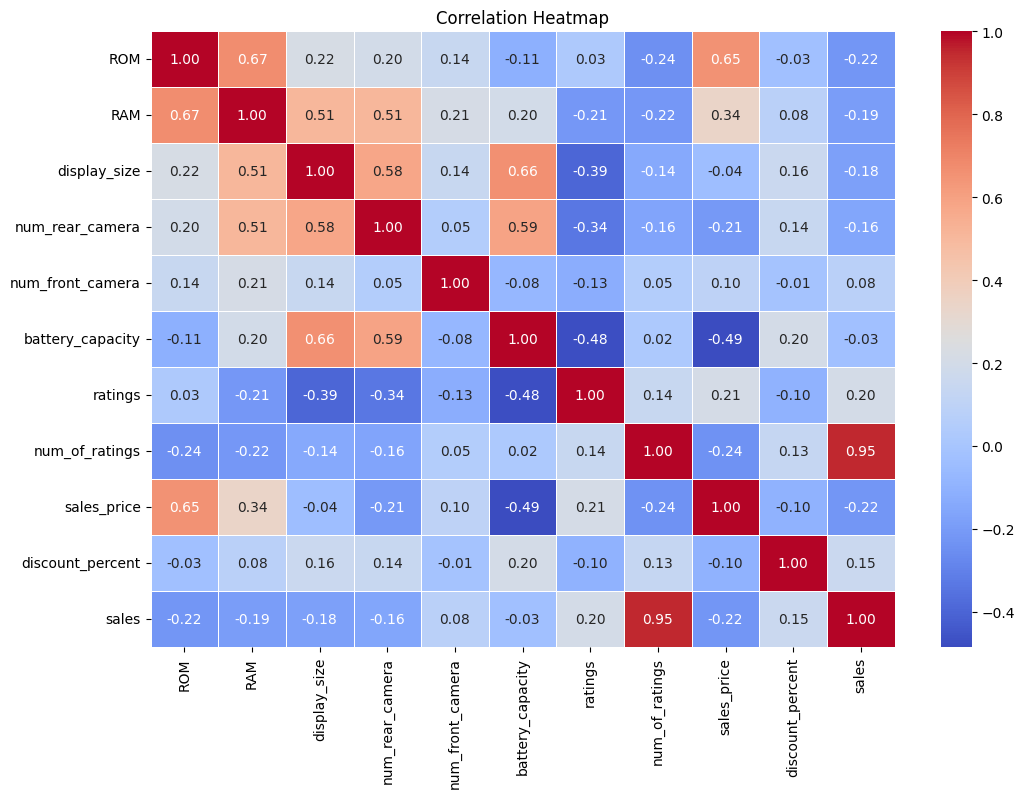

In [41]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


 **Correlation between different features:**

• ROM - ROM is moderately correlated with ROM and sales_price, As RAM size increase sales price and RAM size also increases

• RAM - RAM is positively related with display size and number of cameras.It is relatively less correlated with sales price.

• Display Size - As Size of phone increase number of rear camera and battery capacity also increases.

• Battery Capacity - Battery capacity opposite to what one may think, it is negatively correlated with sales price and ratings.

• Number of ratings - As sales is a derived quantity of number of ratings that’s why it has very high correlation with it